## Práctica - Fundamentos de las Ciencias de Datos

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importación de datasets relacionados a madres, sus hijos y características de gestaciones**

In [108]:
data_nac = pd.read_csv(r'C:\Users\icrui\Documents\DS-ML\FCEIA\3° cuatrimestre\Fundamentos_Cs_Datos\Practica_Gestacion\nacimientos.csv', sep=';', skiprows=3)

In [110]:
data_mad = pd.read_excel(r'C:\Users\icrui\Documents\DS-ML\FCEIA\3° cuatrimestre\Fundamentos_Cs_Datos\Practica_Gestacion\datos_madres.xlsx')

**Limpieza inicial**

In [112]:
data_nac.isna().sum()

id_madre         0
peso_kg_bebe     0
semanas_gest     0
edad_anios       0
hijos_previos    0
dtype: int64

In [114]:
data_nac = data_nac.rename(columns={'id_madre':'id'})

In [116]:
data_mad = data_mad.rename(columns=dict(zip(data_mad.columns, data_mad.columns.str.lower())))

In [118]:
data_mad.isna().sum()

id                     0
altura_m_mujer         0
peso_kg_mujer          0
num_cigarrillos_dia    0
dtype: int64

In [120]:
data_mad['altura_m_mujer'] = data_mad['altura_m_mujer'].str.replace(",", ".")

In [122]:
data_mad['altura_m_mujer'] = data_mad['altura_m_mujer'].astype('float')

**Se unen datasets**

In [124]:
data = pd.merge(data_mad, data_nac, on='id', how='inner')

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   345 non-null    int64  
 1   altura_m_mujer       345 non-null    float64
 2   peso_kg_mujer        345 non-null    float64
 3   num_cigarrillos_dia  345 non-null    int64  
 4   peso_kg_bebe         345 non-null    float64
 5   semanas_gest         345 non-null    float64
 6   edad_anios           345 non-null    int64  
 7   hijos_previos        345 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 21.7 KB


Ejercicio 2. Considerando que el Índice de Masa Corporal (IMC) se define como el peso de una
persona en kilogramos dividido por el cuadrado de la estatura en metros, represente
gráficamente la distribución de dicha variable para las mujeres del dataset. En base al gráfico
realizado, ¿cómo caracterizaría su distribución en relación a la simetría?

In [151]:
data['imc_madre'] = data['peso_kg_mujer']/((data['altura_m_mujer'])**2)

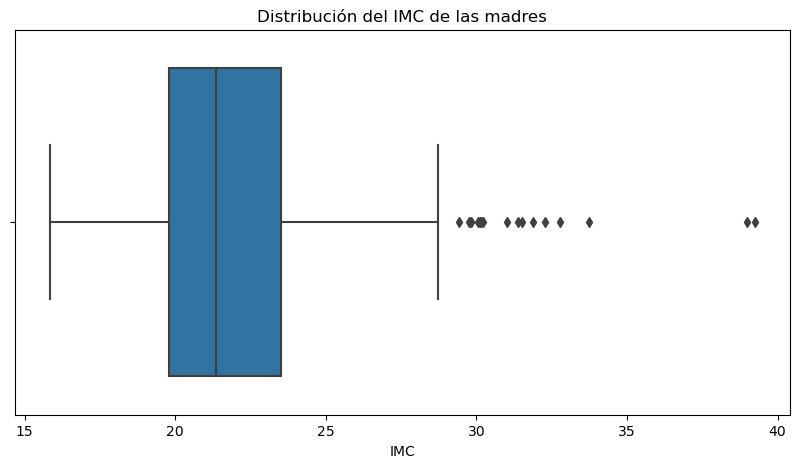

In [199]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='imc_madre', data=data)
plt.xlabel('IMC')
plt.title('Distribución del IMC de las madres')
plt.show()

*La distribución tiene una asimetría con cola hacia la derecha. Su mediana supera los 20 puntos y presenta muchos valores atípicos superiores a 28.*

Ejercicio 3. Genere una variable categórica binaria realizando la dicotomización de la variable
vinculada con el número de cigarrillos consumidos a diario, diferenciando aquellas mujeres que no
fuman habitualmente (no consumen cigarrillos) de aquellas que sí lo hacen (consumen 1 o más
cigarrillos diariamente). ¿Qué porcentaje de las mujeres del dataset son fumadoras?

In [244]:
data['fumadora'] = np.where(data['num_cigarrillos_dia'] > 0, 1, 0)
labels = {1:'fumadoras', 0:'no fumadoras'}
conteo = data['fumadora'].value_counts().sort_index()

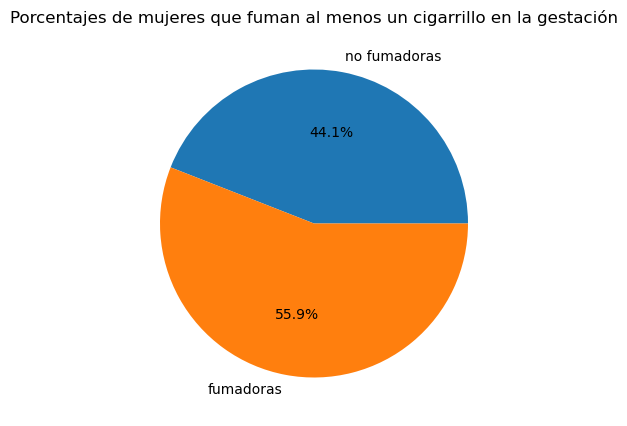

In [260]:
plt.figure(figsize=(5,5))
plt.pie(conteo,
    labels=[labels[i] for i in conteo.index],
    autopct='%1.1f%%')
plt.title('Porcentajes de mujeres que fuman al menos un cigarrillo en la gestación')
plt.show()